# BL40A2010 Introduction to IoT-Based Systems

## Assignment 4, 18.02.2021

### Author: Alex Beattie

In [1]:
import networkx as nx #https://networkx.github.io/
import matplotlib.pyplot as plt #https://matplotlib.org/
import pandas as pd #https://pandas.pydata.org/
import matplotlib.pyplot as plt #https://matplotlib.org/
import matplotlib.dates as mdates #https://matplotlib.org/
#http://en.ilmatieteenlaitos.fi/download-observations#!/
import scipy as sp
import numpy as np

**(1) Draw a graph with star topology with five nodes (one in the center $A$, four in the edges $B$-$E$).
If the topology is directed as a many-to-one topology, write the structure of awareness of the system, considering that nodes $B$-$E$ acquire and process data about a supporting reality $T$, while $A$ can only receive data from it. Remember the notation $Xy$ means the image of $X$ by $Y$.**

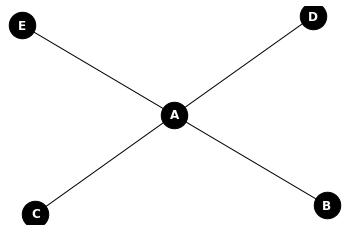

In [2]:

G = nx.Graph()
G = nx.star_graph(4)
labels={0:'A',1:'B',2:'C',3:'D',4:'E'}
G = nx.relabel_nodes(G,labels)
nx.draw_networkx(G, node_color='black', font_color='white', edge_color='black', font_weight='bold',  node_size=700)
plt.axis('off')
plt.show()


The structure of awareness for the system is

$$ \Omega = T + T_{AC} + T_{AD} + T_{AE} + T_{AB} = T(1 + AC + AD + AE + AB) = T\Omega $$

**(2) Assume that graph illustrate a scenario of four sensor nodes that also (pre-)process data and one aggregator node as follows. Nodes $B$ and $C$ monitor temperature and wind speed at Airport station in Lappeenranta, respectively. Nodes $D$ and $E$ monitor temperature and wind speed at Lepola station in Lappeenranta, respectively. Nodes $B$ and $D$ send a binary message to $A$ indicating if during that period the temperature was more than $25$ degrees ("1" means above, "0" means below or equal to). Likewise nodes $C$ and $E$ send a binary message to $A$ indicating if during that period the wind speed was more than $5$ m/s ("1" means above, "0" means below or equal to). Download and plot the data from [FMI](http://en.ilmatieteenlaitos.fi/download-observations\#!/) with 1 hour resolution during July, 2018. Using this data, plot the binary signals sent from the nodes $B$-$E$ to the aggregator $A$.**

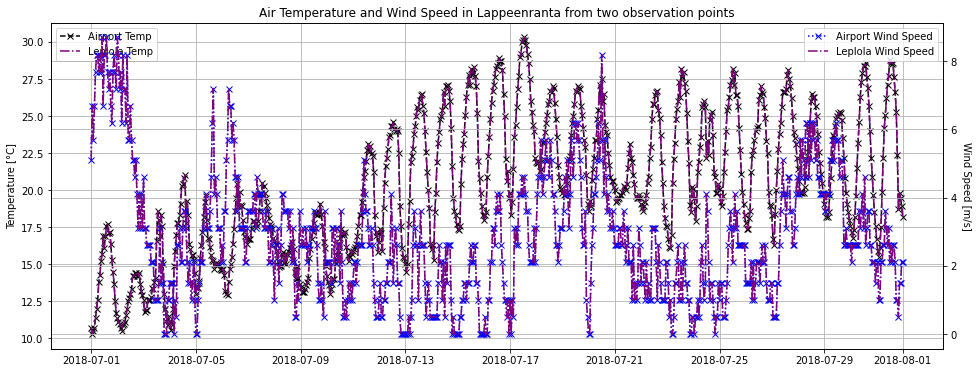

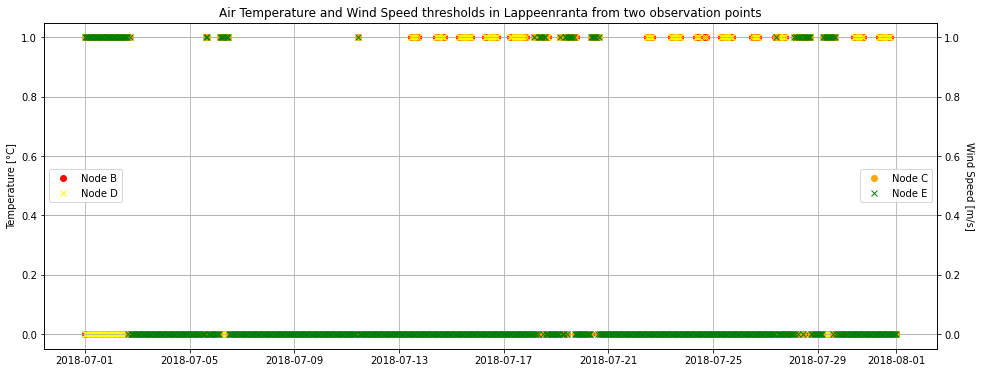

In [3]:
df_airport = pd.read_csv("july_2018_lap_airport.csv",dayfirst=True,sep=",",
                           header=0,decimal=b".",index_col=0,
                           parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5,6])

df_lepola = pd.read_csv("july_2018_lap_airport.csv",dayfirst=True,sep=",",
                           header=0,decimal=b".",index_col=0,
                           parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5,6])

fig, ax1 = plt.subplots(figsize=(16,6))

#left axis
#Airport
ax1.set_ylabel("Temperature [°C]", color='black')
ax1.plot(df_airport['Air temperature (degC)'], color='black',linestyle='--',marker='x', label='Airport Temp')
#Leploa
ax1.plot(df_lepola['Air temperature (degC)'], color='purple',linestyle='-.', label='Leplola Temp')

ax1.grid(True)
ax1.legend()
# Right axis
ax2 = ax1.twinx()
ax2.set_ylabel("Wind Speed [m/s]", color='black', rotation=270,va="bottom")
ax2.plot(df_airport['Wind speed (m/s)'], color='blue',linestyle=':', marker='x', label='Airport Wind Speed')

#Leploa
ax2.plot(df_lepola['Wind speed (m/s)'], color='purple',linestyle='-.', label='Leplola Wind Speed')

plt.title("Air Temperature and Wind Speed in Lappeenranta from two observation points")
plt.grid()
plt.legend()
plt.show()

fig, ax1 = plt.subplots(figsize=(16,6))
#left axis
#Airport
ax1.set_ylabel("Temperature [°C]", color='black')
ax1.plot(df_airport['Air temperature (degC)'] > 25, color='red', marker='o',linestyle='', label='Node B')
#Leploa
ax1.plot(df_lepola['Air temperature (degC)'] > 25, color='yellow', marker='x',linestyle='', label='Node D')

ax1.grid(True)
ax1.legend(loc='center left')
# Right axis
ax2 = ax1.twinx()
ax2.set_ylabel("Wind Speed [m/s]", color='black', rotation=270,va="bottom")
ax2.plot(df_airport['Wind speed (m/s)'] > 5, color='orange', marker='o',linestyle='', label='Node C')

#Leploa
ax2.plot(df_lepola['Wind speed (m/s)'] > 5, color='green', marker='x',linestyle='', label='Node E')

ax2.legend(loc='center right')
plt.xlabel("Date")
plt.title("Air Temperature and Wind Speed thresholds in Lappeenranta from two observation points")
plt.grid()
plt.show()

**(3) Node $A$ needs to identify risky situations in Lappeenranta when the temperature is above $25$ degrees and the wind is above $5$ m/s based on the sensors' signals. If a risky situation is identified at node $A$ as binary number "1" while normal situations as "0". How would you solve this problem? Plot the output signal from node $A$ and discuss its relation to the input signals from $B$-$E$.**

This could be solved by aggregating the signals coming from the sensor nodes and using an or gate for each sensor that is reporting
the same data and an and gate for the collective signal of both.
This would be written in pseudocode as the following:

If [node B or node D] and [node C or node E] then node A <-- 1 else Node A <-- 0

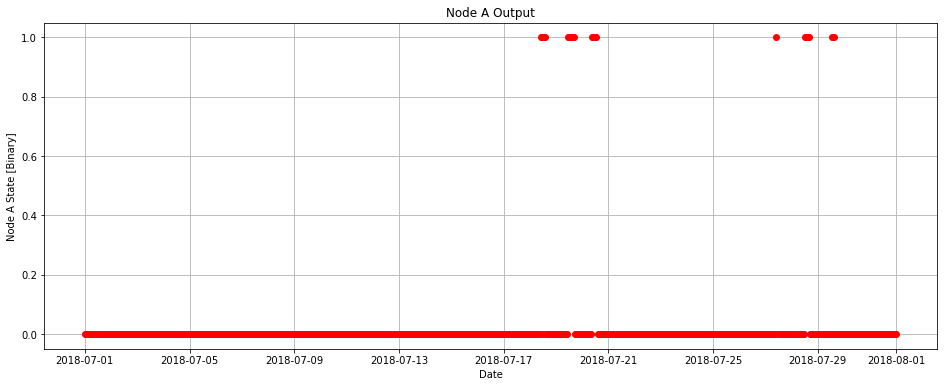

In [4]:
fig, ax1 = plt.subplots(figsize=(16,6))
#left axis
#Airport

Node_B = df_airport['Air temperature (degC)'] > 25
Node_C = df_airport['Wind speed (m/s)'] > 5
Node_D = df_lepola['Air temperature (degC)'] > 25
Node_E = df_lepola['Wind speed (m/s)'] > 5

Node_A= (Node_B | Node_D) & (Node_C | Node_E)

plt.plot(Node_A, color='red', marker='o',linestyle='', label='Node B')

plt.title("Node A Output")
plt.xlabel("Date")
plt.ylabel("Node A State [Binary]", color='black')
plt.grid()
plt.show()
